In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('tips.csv')
df


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
#This is done to tranform categorical to numerical data
df.replace({'Yes': 1, 'No': 0, 'Dinner': 1,'Lunch': 0, 'Male': 1, 'Female': 0, 'Thur': 0, 'Fri':1, 'Sat' : 2, 'Sun' : 3}, inplace=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


Identifying Significant Factors (Feature Importance)


In [6]:

X = df.drop(columns=["tip"]) 
y = df["tip"] 

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest for Feature Importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importance:\n", feature_importance)


Feature Importance:
       Feature  Importance
0  total_bill    0.774991
2      smoker    0.071706
5        size    0.058423
3         day    0.056699
1         sex    0.026599
4        time    0.011583


Prediction Accuracy: Build and Evaluate Models


In [9]:

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Scale data for SVR and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
results = []

for name, model in models.items():
    if name in ["SVR", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MSE": mse, "R2 Score": r2})

results_df = pd.DataFrame(results)
print("Model Performance:\n", results_df)


Model Performance:
                Model       MSE  R2 Score
0  Linear Regression  0.696309  0.442940
1   Ridge Regression  0.693739  0.444996
2   Lasso Regression  0.670251  0.463787
3      Decision Tree  1.155767  0.075365
4      Random Forest  0.859600  0.312305
5                SVR  0.751499  0.398787
6                KNN  0.755033  0.395960


Insights for Management

In [10]:

top_features = feature_importance.head(5)
print("Top Features Affecting Tips:\n", top_features)

print("\nInsights for Management:")
print("1. Focus on the most important factors like", top_features.iloc[0]["Feature"], "to maximize tip amounts.")
print("2. Implement targeted strategies based on customer demographics or behaviors to improve service.")
print("3. Utilize predictive models to anticipate tipping patterns and tailor services accordingly.")


Top Features Affecting Tips:
       Feature  Importance
0  total_bill    0.774991
2      smoker    0.071706
5        size    0.058423
3         day    0.056699
1         sex    0.026599

Insights for Management:
1. Focus on the most important factors like total_bill to maximize tip amounts.
2. Implement targeted strategies based on customer demographics or behaviors to improve service.
3. Utilize predictive models to anticipate tipping patterns and tailor services accordingly.


SCATTER PLOT to study relationship between target variable and predictors

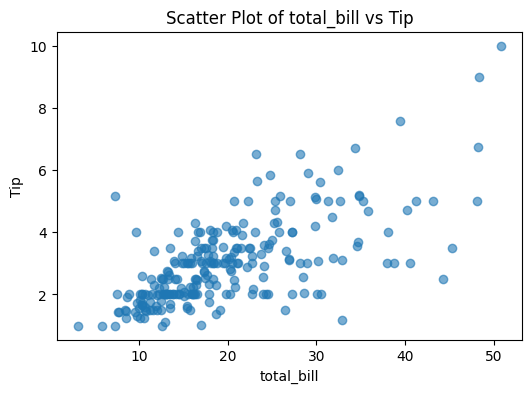

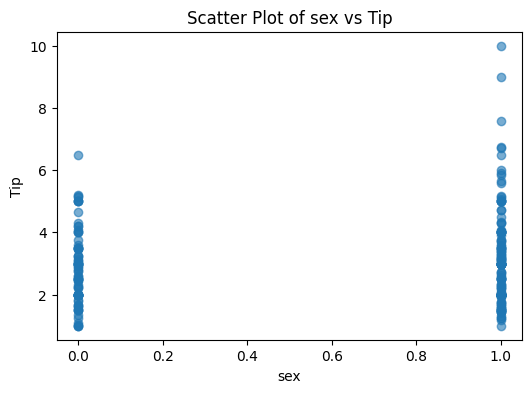

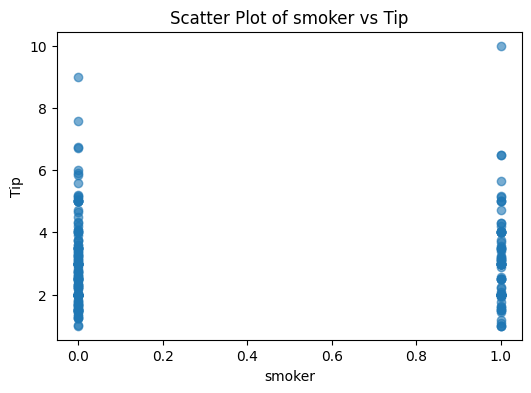

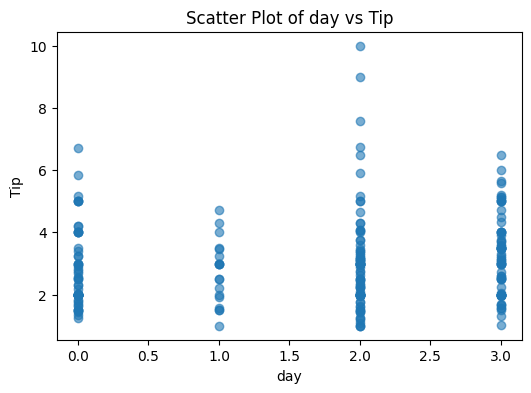

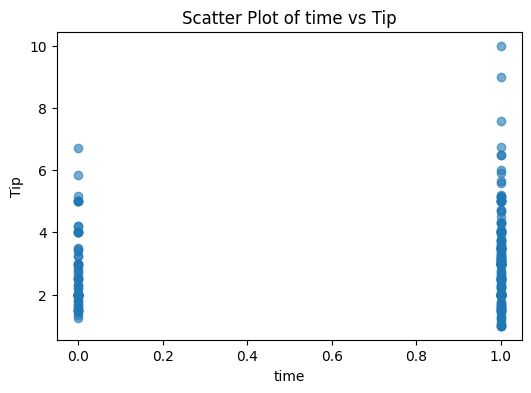

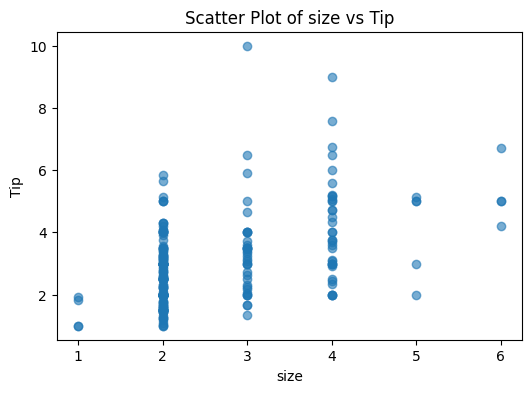

In [11]:

# Scatter plot for each feature against the target
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y, alpha=0.6)
    plt.title(f"Scatter Plot of {column} vs Tip")
    plt.xlabel(column)
    plt.ylabel("Tip")
    plt.show()

In [ ]:
PAIR PLOT

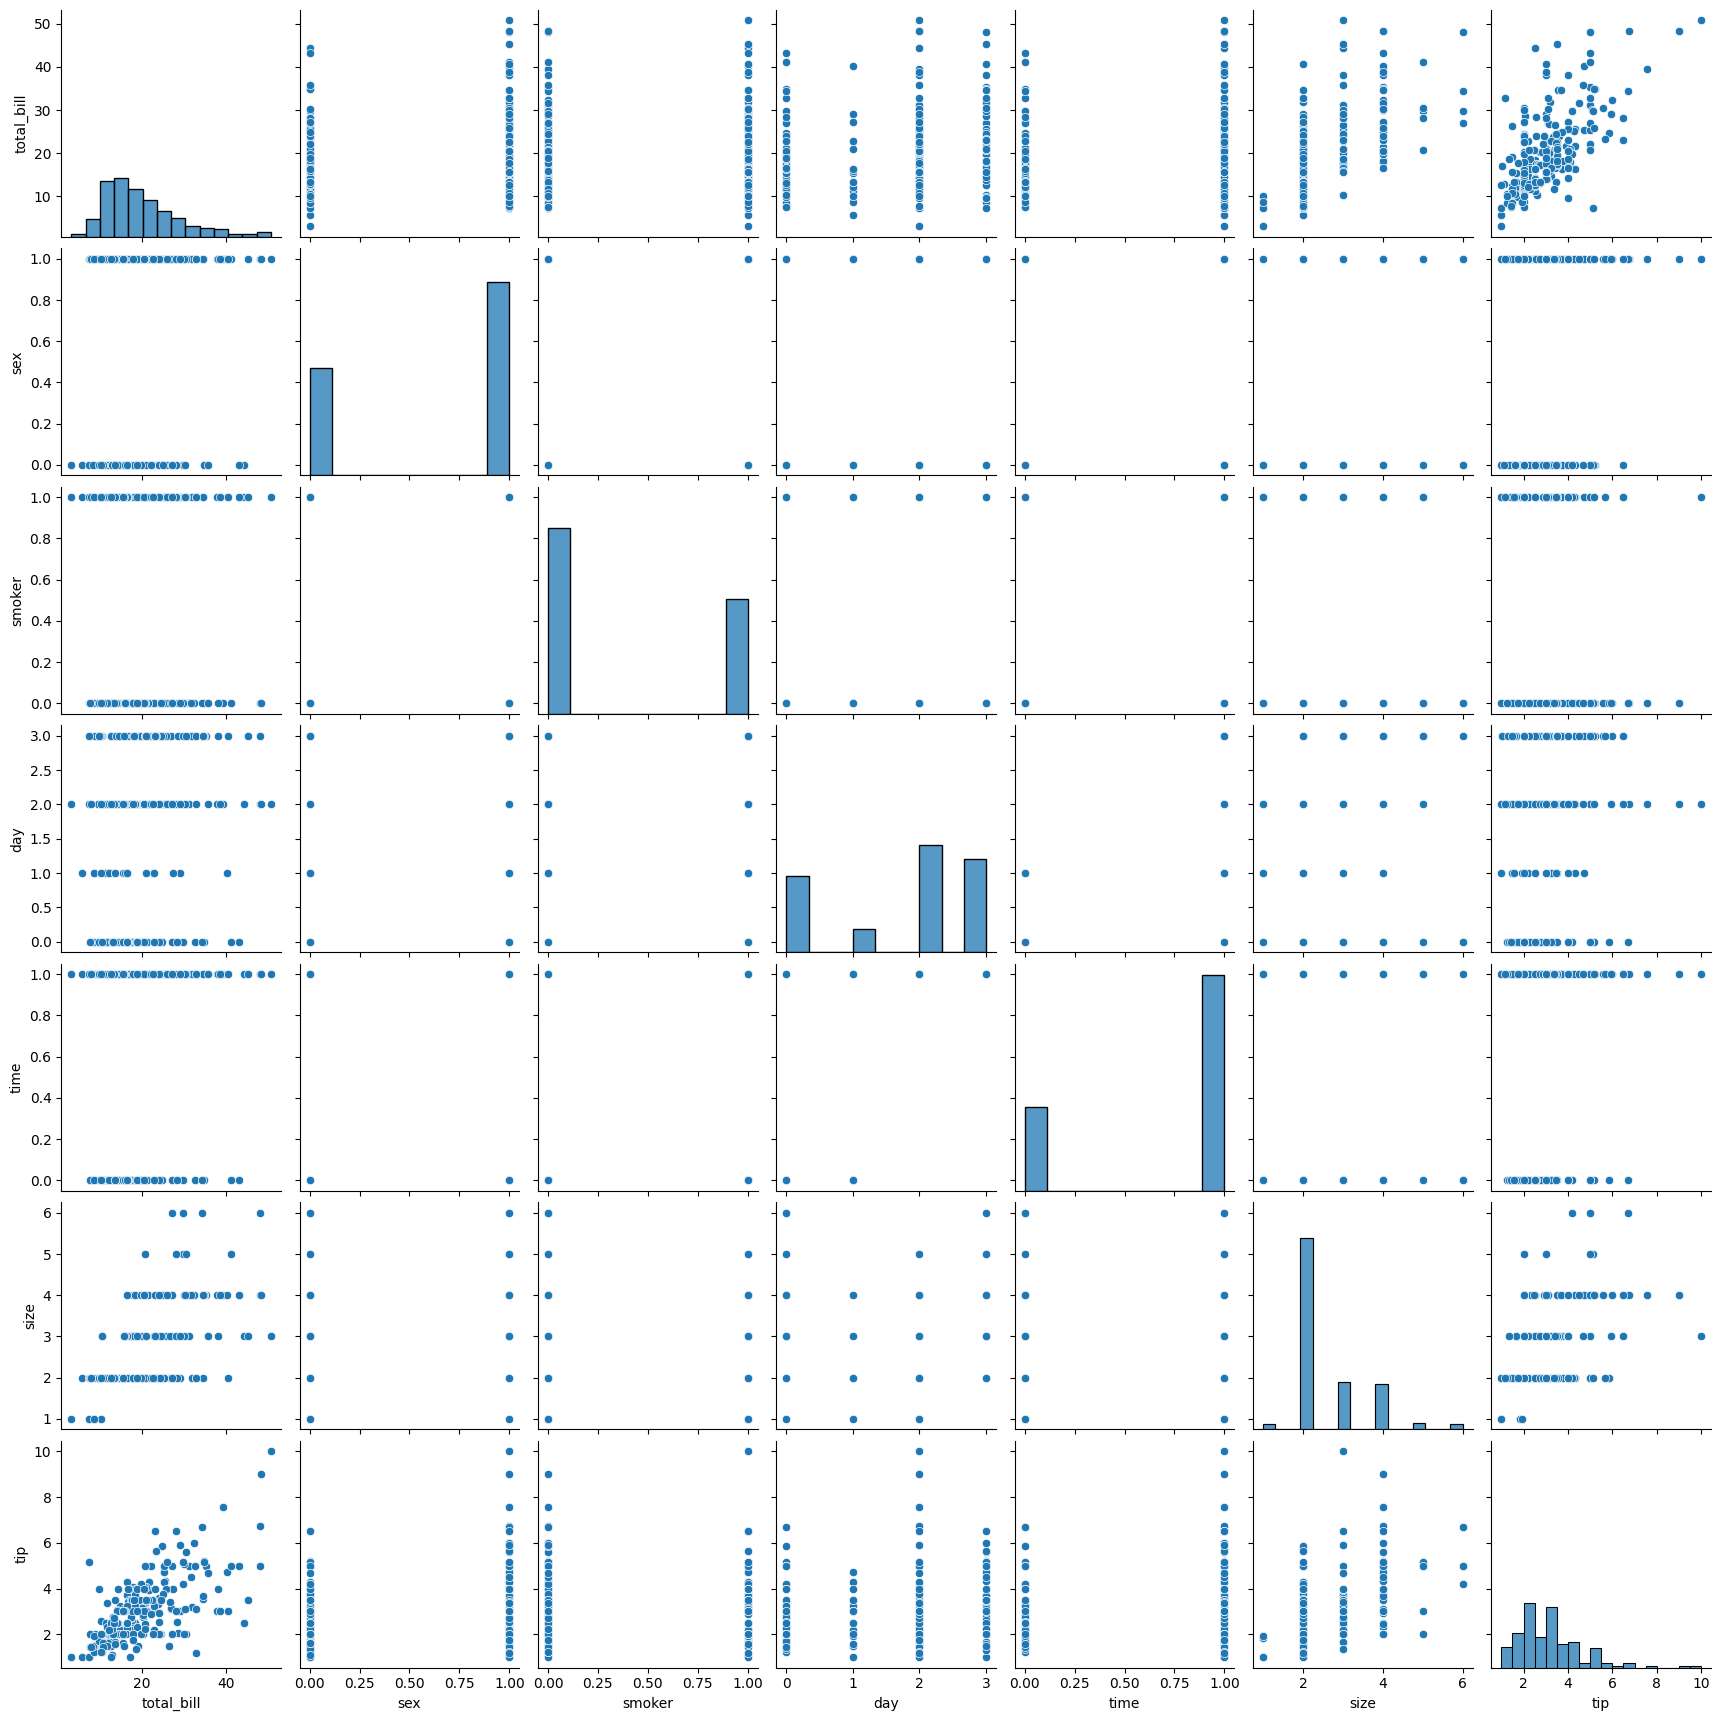

In [14]:
# Combine features and target for pair plot
data_with_target = pd.concat([X, y], axis=1)

# Pair plot
sns.pairplot(data_with_target)
plt.show()


In [ ]:
CORRELATION MATRIX

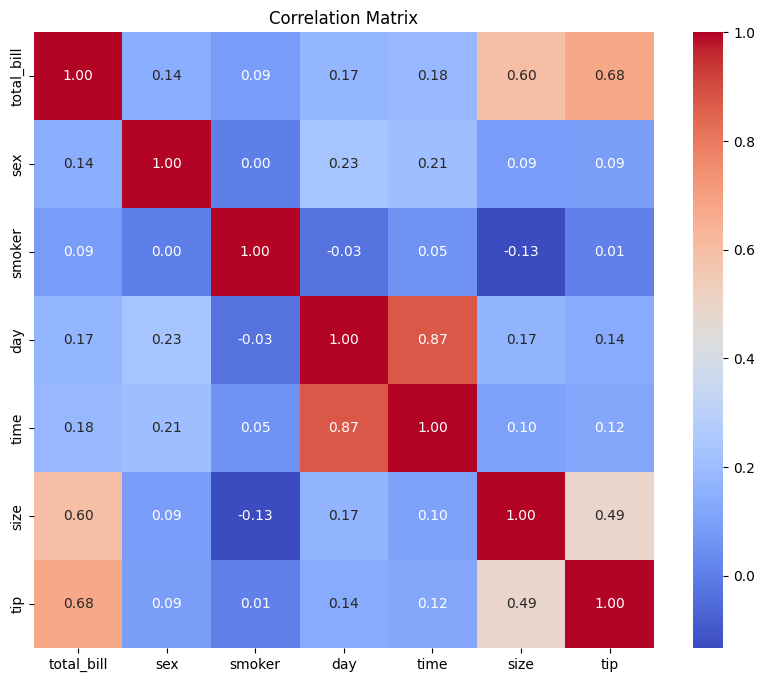

In [15]:
# Correlation matrix
correlation_matrix = data_with_target.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


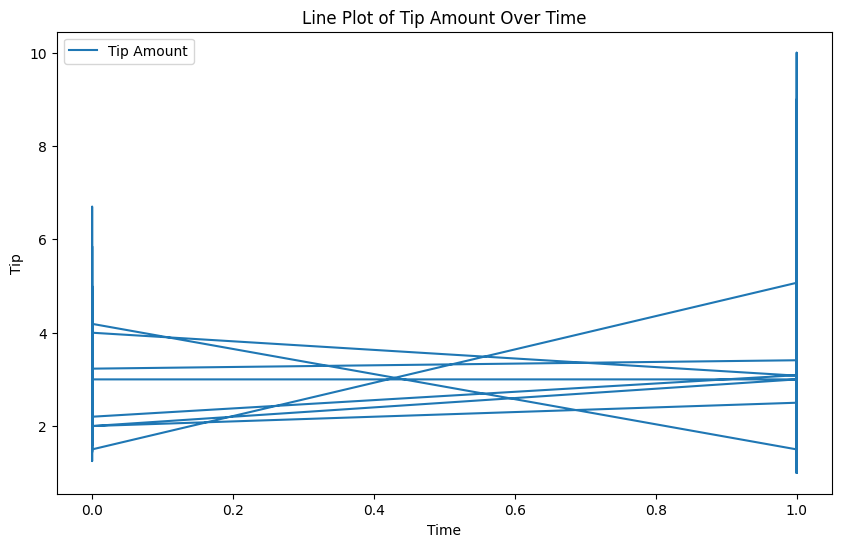

In [21]:
if "time" in df.columns:  # Replace 'time' with the actual time column
    plt.figure(figsize=(10, 6))
    plt.plot(df["time"], y, label="Tip Amount")
    plt.title("Line Plot of Tip Amount Over Time")
    plt.xlabel("Time")
    plt.ylabel("Tip")
    plt.legend()
    plt.show()
else:
    print("Time-series data not detected.")


Could not perform rainbow test due to model installation error. Rather used Residual Analysis to accept or reject linerarity

RESIDUAL ANALYSIS FOR LINEARTIY

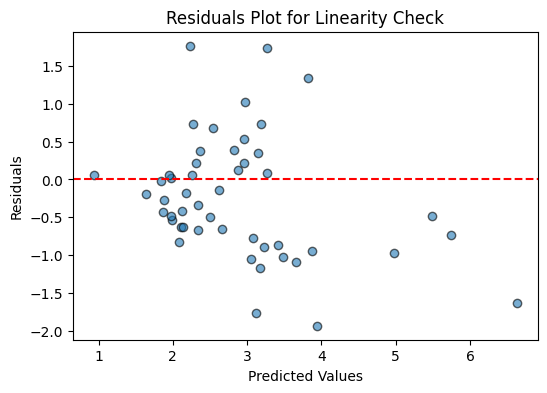

Mean of residuals: -0.24032053339233586


In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and calculate residuals
y_pred = linear_model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor="k")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals Plot for Linearity Check")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Check residual mean (should be close to 0 for a good linear fit)
print("Mean of residuals:", np.mean(residuals))


In [ ]:
LINEAR TREND IS OBSERVED

APPLYING LINEAR REGRESSION FOR MODEL PREDICTION

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression Performance:")
print("MSE:", mse_linear)
print("R2 Score:", r2_linear)


Linear Regression Performance:
MSE: 0.6963090766605349
R2 Score: 0.4429399687489898


DESCRIPTION OF ANALYSIS

MSE- The square root of MSE (√0.6963 ≈ 0.8346) represents an average error of approximately 0.83 in predicting tip amounts.
This is significant, as the error is around 10-20% of the range of tip values, suggesting the model's predictions are not highly accurate.

R² -An R² of 0.4429 (approximately 44.3%) indicates that the linear model explains 44.3% of the variance in tip amounts.

